<a href="https://colab.research.google.com/github/RubaEgbaria/Predict-the-Introverts-from-the-Extroverts/blob/master/Predict_the_Introverts_from_the_Extroverts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict the Introverts from the Extroverts

## Load the Data and show a preview

In [1]:
import pandas as pd

data = pd.read_csv("train.csv")
data

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


## Identifying and Handling Missing Values

In [2]:
data.isnull().sum()

,0
id,0
Time_spent_Alone,1190
Stage_fear,1893
Social_event_attendance,1180
Going_outside,1466
Drained_after_socializing,1149
Friends_circle_size,1054
Post_frequency,1264
Personality,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [4]:
data.describe().T.style.background_gradient(cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
id,18524.000000,9261.500000,5347.562529,0.000000,4630.750000,9261.500000,13892.250000,18523.000000
Time_spent_Alone,17334.000000,3.137764,3.003786,0.000000,1.000000,2.000000,4.000000,11.000000
Social_event_attendance,17344.000000,5.265106,2.753359,0.000000,3.000000,5.000000,8.000000,10.000000
Going_outside,17058.000000,4.044319,2.062580,0.000000,3.000000,4.000000,6.000000,7.000000
Friends_circle_size,17470.000000,7.996737,4.223484,0.000000,5.000000,8.000000,12.000000,15.000000
Post_frequency,17260.000000,4.982097,2.879139,0.000000,3.000000,5.000000,7.000000,10.000000


Creating new class 'None' for both Stage_fear and Drained_after_socializing

In [5]:
data['Stage_fear'] = data['Stage_fear'].fillna('None')
data['Drained_after_socializing'] = data['Drained_after_socializing'].fillna('None')

Drop unneeded feature ID as it just refer to the identity

In [6]:
data = data.dropna(subset=['id'])

Fill numeric values by the mean value of each parameter

In [7]:
data['Time_spent_Alone'] = data['Time_spent_Alone'].fillna(data['Time_spent_Alone'].mean())
data['Social_event_attendance'] = data['Social_event_attendance'].fillna(data['Social_event_attendance'].mean())
data['Going_outside'] = data['Going_outside'].fillna(data['Going_outside'].mean())
data['Friends_circle_size'] = data['Friends_circle_size'].fillna(data['Friends_circle_size'].mean())
data['Post_frequency'] = data['Post_frequency'].fillna(data['Post_frequency'].mean())

check data after handling missing values

In [8]:
data.isnull().sum()

,0
id,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [9]:
data.describe().T.style.background_gradient(cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
id,18524.000000,9261.500000,5347.562529,0.000000,4630.750000,9261.500000,13892.250000,18523.000000
Time_spent_Alone,18524.000000,3.137764,2.905696,0.000000,1.000000,3.000000,4.000000,11.000000
Social_event_attendance,18524.000000,5.265106,2.664215,0.000000,3.000000,5.265106,7.000000,10.000000
Going_outside,18524.000000,4.044319,1.979276,0.000000,3.000000,4.000000,6.000000,7.000000
Friends_circle_size,18524.000000,7.996737,4.101561,0.000000,5.000000,8.000000,11.000000,15.000000
Post_frequency,18524.000000,4.982097,2.779168,0.000000,3.000000,5.000000,7.000000,10.000000


Count of people that are introvert and Stage_fear and Drained_after_socializing = true

In [10]:
print('Count of people that are introvert and Stage_fear and Drained_after_socializing = true' ,((data['Personality'] == 'Introvert') & (data['Stage_fear'] == 'Yes') & (data['Drained_after_socializing'] == 'Yes')).sum())
print('Count of introverts: ', (data['Personality'] == 'Introvert').sum())

Count of people that are introvert and Stage_fear and Drained_after_socializing = true 3125
Count of introverts:  4825


As we notice the two features effect the classification strongly, yet the other features contribution helps to get the right classification with higher accuracy.

In [11]:
data['Stage_fear'] = data['Stage_fear'].replace({'Yes': 1, 'No': 0, 'None': -1})
data['Drained_after_socializing'] = data['Drained_after_socializing'].replace({'Yes': 1, 'No': 0, 'None': -1})

/tmp/ipython-input-11-3289870756.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Stage_fear'] = data['Stage_fear'].replace({'Yes': 1, 'No': 0, 'None': -1})
/tmp/ipython-input-11-3289870756.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Drained_after_socializing'] = data['Drained_after_socializing'].replace({'Yes': 1, 'No': 0, 'None': -1})


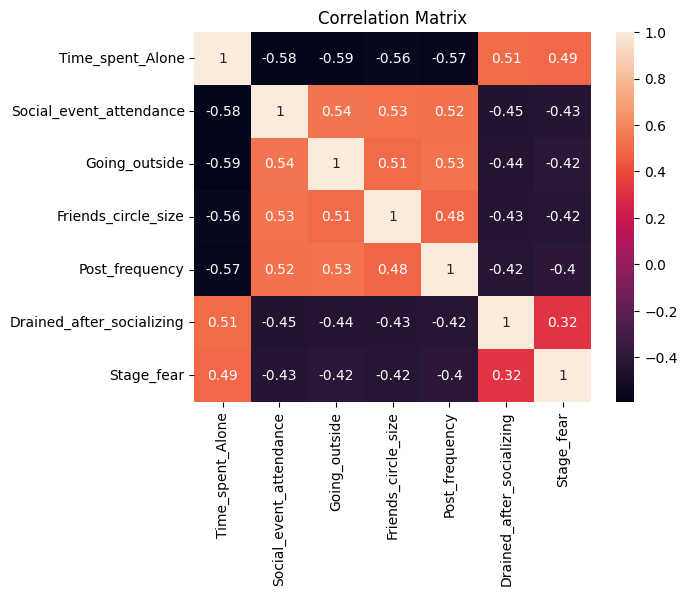

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(data = data, columns = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency','Drained_after_socializing','Stage_fear'])

sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

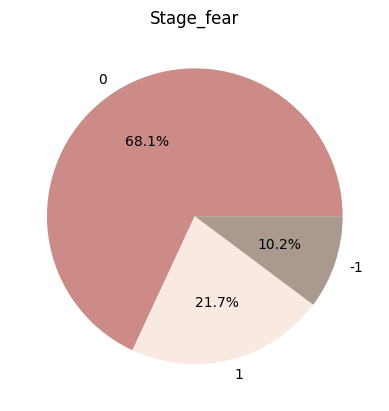

In [13]:
# pie plot Stage_fear
plt.pie(data['Stage_fear'].value_counts(), labels=data['Stage_fear'].value_counts().index, autopct='%1.1f%%', colors=['#cc8b86ff','#f9eae1ff','#aa998fff'])
plt.title('Stage_fear')
plt.show()

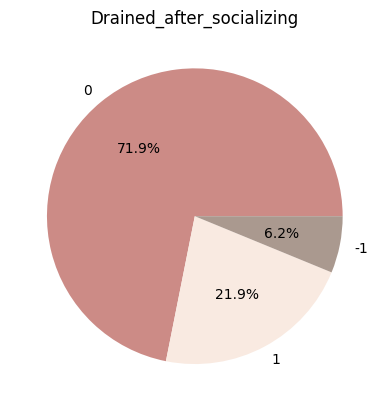

In [14]:
# pie plot Drained_after_socializing
plt.pie(data['Drained_after_socializing'].value_counts(), labels=data['Drained_after_socializing'].value_counts().index, autopct='%1.1f%%', colors=['#cc8b86ff','#f9eae1ff','#aa998fff'])
plt.title('Drained_after_socializing')
plt.show()

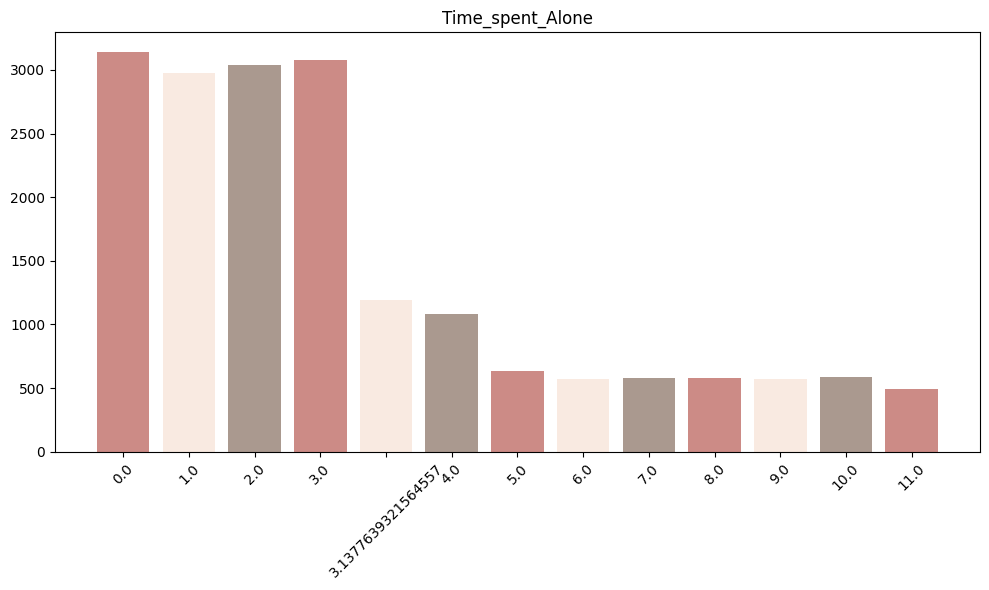

In [15]:
# bar plot Time_spent_Alone
counts = data['Time_spent_Alone'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
positions = range(len(counts))
plt.bar(positions, counts.values, color=['#cc8b86ff', '#f9eae1ff', '#aa998fff'])
plt.xticks(positions, counts.index, rotation=45)
plt.title('Time_spent_Alone')
plt.tight_layout()
plt.show()

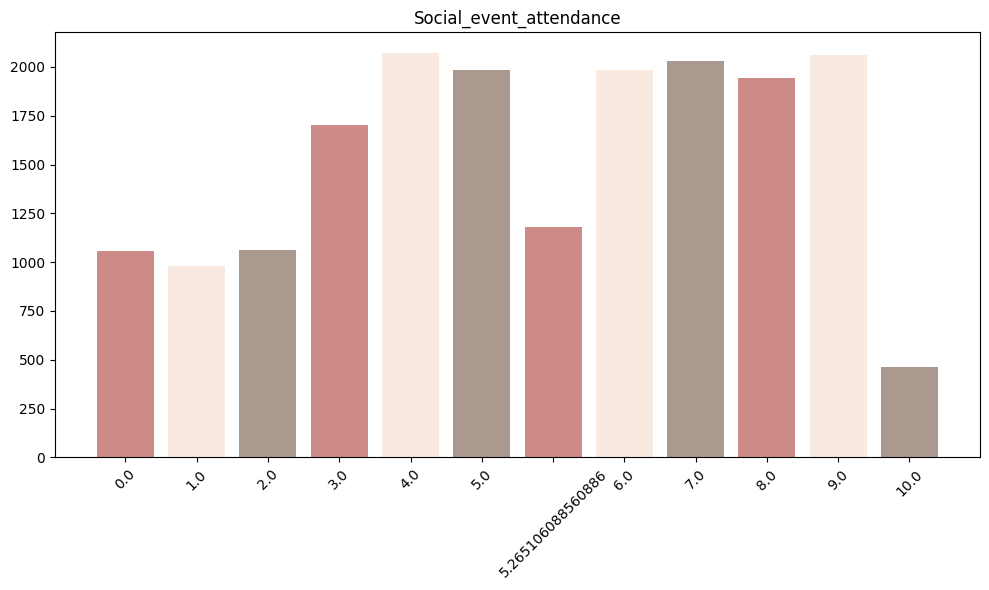

In [16]:
# bar plot Social_event_attendance
counts = data['Social_event_attendance'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
positions = range(len(counts))
plt.bar(positions, counts.values, color=['#cc8b86ff', '#f9eae1ff', '#aa998fff'])
plt.xticks(positions, counts.index, rotation=45)
plt.title('Social_event_attendance')
plt.tight_layout()
plt.show()

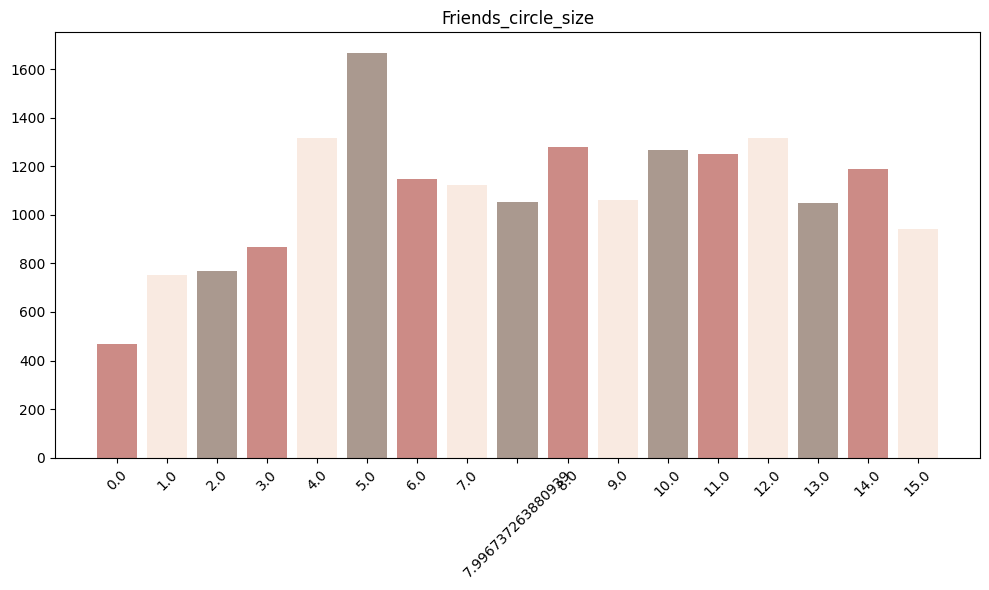

In [17]:
# bar plot Friends_circle_size
counts = data['Friends_circle_size'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
positions = range(len(counts))
plt.bar(positions, counts.values, color=['#cc8b86ff', '#f9eae1ff', '#aa998fff'])
plt.xticks(positions, counts.index, rotation=45)
plt.title('Friends_circle_size')
plt.tight_layout()
plt.show()

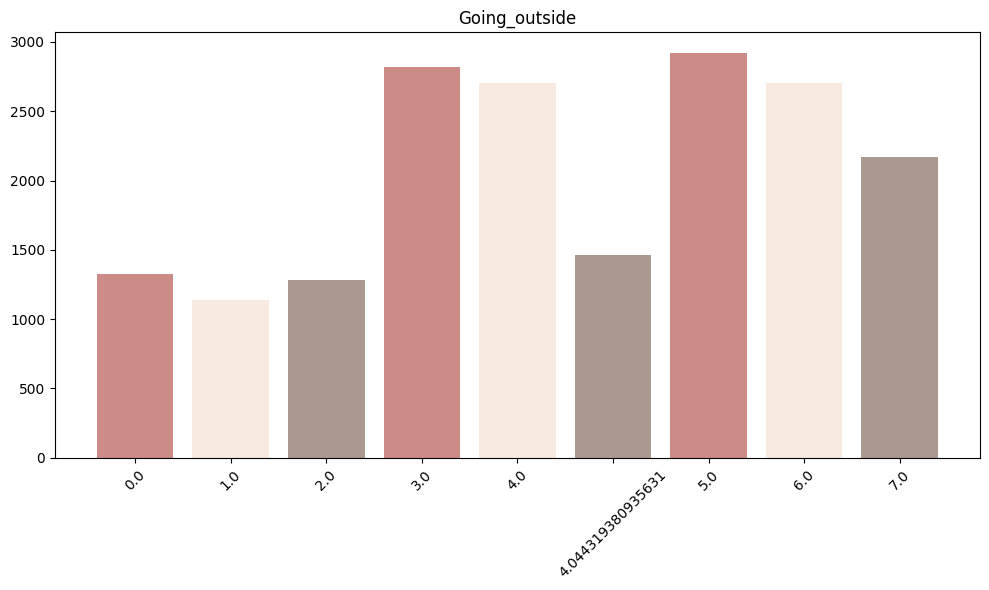

In [18]:
# bar plot Going_outside
counts = data['Going_outside'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
positions = range(len(counts))
plt.bar(positions, counts.values, color=['#cc8b86ff', '#f9eae1ff', '#aa998fff'])
plt.xticks(positions, counts.index, rotation=45)
plt.title('Going_outside')
plt.tight_layout()
plt.show()

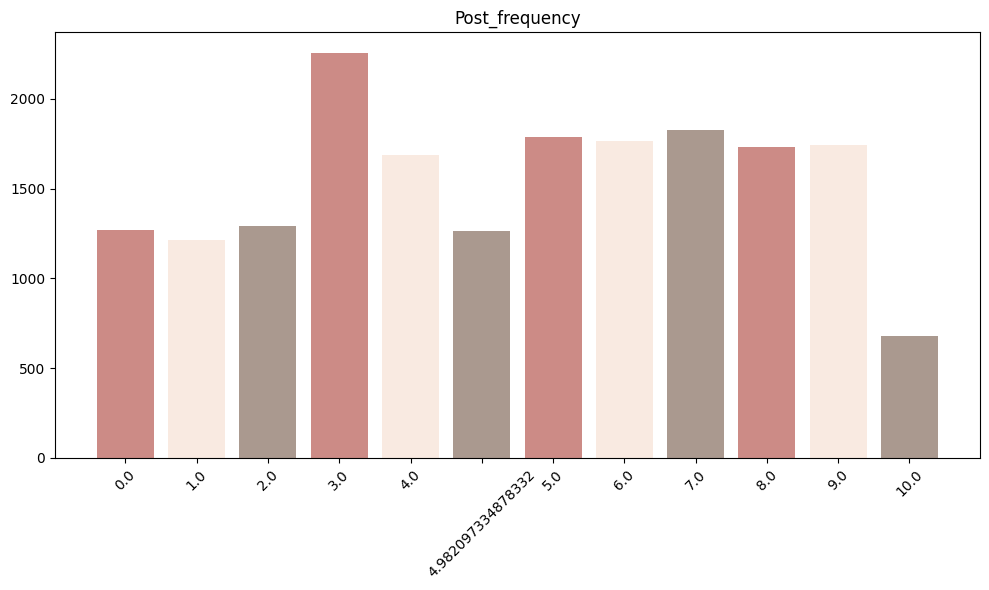

In [19]:
# bar plot Post_frequency
counts = data['Post_frequency'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
positions = range(len(counts))
plt.bar(positions, counts.values, color=['#cc8b86ff', '#f9eae1ff', '#aa998fff'])
plt.xticks(positions, counts.index, rotation=45)
plt.title('Post_frequency')
plt.tight_layout()
plt.show()

## The training process

In [20]:
testData = pd.read_csv("test.csv")
testData['Drained_after_socializing'] = testData['Drained_after_socializing'].fillna('None')
testData['Stage_fear'] = testData['Stage_fear'].fillna('None')
testData['Drained_after_socializing'] = testData['Drained_after_socializing'].replace({'Yes': 1, 'No': 0, 'None': -1})
testData['Stage_fear'] = testData['Stage_fear'].replace({'Yes': 1, 'No': 0, 'None': -1})
testData['Time_spent_Alone'] = testData['Time_spent_Alone'].fillna(testData['Time_spent_Alone'].mean())
testData['Social_event_attendance'] = testData['Social_event_attendance'].fillna(testData['Social_event_attendance'].mean())
testData['Friends_circle_size'] = testData['Friends_circle_size'].fillna(testData['Friends_circle_size'].mean())
testData['Going_outside'] = testData['Going_outside'].fillna(testData['Going_outside'].mean())
testData['Post_frequency'] = testData['Post_frequency'].fillna(testData['Post_frequency'].mean())
testData

/tmp/ipython-input-20-587970273.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  testData['Drained_after_socializing'] = testData['Drained_after_socializing'].replace({'Yes': 1, 'No': 0, 'None': -1})
/tmp/ipython-input-20-587970273.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  testData['Stage_fear'] = testData['Stage_fear'].replace({'Yes': 1, 'No': 0, 'None': -1})


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.00000,0,7.0,4.0,0,6.0,5.028958
1,18525,3.11687,1,0.0,0.0,1,5.0,1.000000
2,18526,3.00000,0,5.0,6.0,0,15.0,9.000000
3,18527,3.00000,0,4.0,4.0,0,5.0,6.000000
4,18528,9.00000,1,1.0,2.0,1,1.0,1.000000
...,...,...,...,...,...,...,...,...
6170,24694,3.00000,0,5.0,5.0,0,9.0,6.000000
6171,24695,8.00000,1,2.0,1.0,1,0.0,0.000000
6172,24696,2.00000,0,4.0,3.0,0,9.0,7.000000
6173,24697,3.00000,0,4.0,4.0,0,11.0,9.000000


In [21]:
# split the data train, test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

xTrain = data.drop(['Personality'], axis=1)
yTrain = data['Personality']

xTrainSplit, xVal, yTrainSplit, yVal = train_test_split(xTrain, yTrain, test_size=0.2, random_state=42)

xTest = testData

# **DecisionTreeClassifier**

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# tuning the algorithm for the best hyperparameters

# param_grid = {
#     'max_depth': [None, 5, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'criterion': ['gini', 'entropy']
# }

# tree = DecisionTreeClassifier()
# grid_search = GridSearchCV(tree, param_grid, cv=5)
# grid_search.fit(xTrainSplit, yTrainSplit)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

# output
# Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
# Best Score: 0.9681494163509191

In [23]:
tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10, criterion='gini')
clf = tree.fit(xTrainSplit, yTrainSplit)
yPredDT = clf.predict(xTest)

In [24]:
from sklearn.metrics import accuracy_score, classification_report
yValPred = clf.predict(xVal)

print("Validation Accuracy:", accuracy_score(yVal, yValPred))
print("Validation Report:\n", classification_report(yVal, yValPred))

Validation Accuracy: 0.9665317139001349
Validation Report:
               precision    recall  f1-score   support

   Extrovert       0.97      0.98      0.98      2753
   Introvert       0.95      0.92      0.93       952

    accuracy                           0.97      3705
   macro avg       0.96      0.95      0.96      3705
weighted avg       0.97      0.97      0.97      3705



# ***SVC***

In [25]:
print("hii")

hii


In [26]:
# from sklearn.svm import SVC

# # tuning the algorithm for the best hyperparameters

# param_grid = {
#     'C': [1, 10],
#     'kernel': ['linear', 'rbf'],
# }

# svc = SVC()
# random_search = GridSearchCV(svc, param_grid, cv=5)
# random_search.fit(xTrainSplit, yTrainSplit)

# print("Best Parameters:", random_search.best_params_)
# print("Best Score:", random_search.best_score_)

# tuning is taking so much time > 45mins, so we just skipped this algorithm.

In [27]:
# # SVC
# svc = SVC()
# svc.fit(xTrainSplit, yTrainSplit)
# yPredSVC = svc.predict(xTest)

# yValPred = svc.predict(xVal)

# print("Validation Accuracy:", accuracy_score(yVal, yValPred))
# print("Validation Report:\n", classification_report(yVal, yValPred))

# **KNN**

In [28]:
# KNN
# tuning the algorithm for the best hyperparameters
from sklearn.neighbors import KNeighborsClassifier

# param_grid = {
#     'n_neighbors': [3, 5, 7],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2]
# }

# knn = KNeighborsClassifier()
# grid_search = GridSearchCV(knn, param_grid, cv=5)
# grid_search.fit(xTrainSplit, yTrainSplit)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

# output
# Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
# Best Score: 0.944058525685433

Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best Score: 0.944058525685433


In [31]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3, p=1, weights='uniform')
knn.fit(xTrainSplit, yTrainSplit)
yPredKNN = knn.predict(xTest)

yValPred = knn.predict(xVal)

print("Validation Accuracy:", accuracy_score(yVal, yValPred))
print("Validation Report:\n", classification_report(yVal, yValPred))

Validation Accuracy: 0.9519568151147099
Validation Report:
               precision    recall  f1-score   support

   Extrovert       0.96      0.98      0.97      2753
   Introvert       0.94      0.87      0.90       952

    accuracy                           0.95      3705
   macro avg       0.95      0.92      0.94      3705
weighted avg       0.95      0.95      0.95      3705



# **RandomForestClassifier**

In [29]:
from sklearn.ensemble import RandomForestClassifier

# rfc = RandomForestClassifier()
# params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
# grid = GridSearchCV(rfc, params, cv=5)
# yPredRFC = grid.fit(xTrainSplit, yTrainSplit)

# print("Best Parameters:", grid.best_params_)
# print("Best Score:", grid.best_score_)

# output
# Best Parameters: {'max_depth': 10, 'n_estimators': 200}
# Best Score: 0.96902663210637

Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Best Score: 0.96902663210637


In [30]:
rfc = RandomForestClassifier(max_depth=10, n_estimators=200)
rfc.fit(xTrainSplit, yTrainSplit)
yPredRFC = rfc.predict(xTest)

yValPred = rfc.predict(xVal)

print("Validation Accuracy:", accuracy_score(yVal, yValPred))
print("Validation Report:\n", classification_report(yVal, yValPred))

Validation Accuracy: 0.9681511470985156
Validation Report:
               precision    recall  f1-score   support

   Extrovert       0.98      0.98      0.98      2753
   Introvert       0.95      0.93      0.94       952

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



## Observations: In the training process, 3 algorithms were employed in order to comapare and get the one that performs the best. The three algorithms are:


*   Decision Tree

*   k-nearest neigh

*   Random Forest

The outcome are very close, all of them gave great accuracy and F1 score (>95)

I will pick the Random forest predictions.






## Generate the predictions .csv file

In [32]:
predictions = pd.DataFrame({'id': testData['id'], 'Personality': yPredRFC})
predictions.to_csv('predictions.csv', index=False)